In [37]:
# This is the third of four code batches. It requires a file import generated from the second code batch.
# If you need to:
# pip install plotly-express

In [38]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [39]:
# The metadata and file names for these are updated periodically. 
# Download the .csv files. You will need to modify the file names in the code below.

df1019 = pd.read_csv('Crime_Data_from_2010_to_2019_20260118.csv', parse_dates=['DATE OCC'])

# Downloaded from: https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/about_data

df24 = pd.read_csv('Crime_Data_from_2020_to_Present_20260118.csv', parse_dates=['DATE OCC'])

# Downloaded: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data


/tmp/ipykernel_16768/437501697.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipykernel_16768/437501697.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [40]:
# Combine the two data frames

newdf = pd.concat([df1019, df24], ignore_index=True)

In [41]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138128 entries, 0 to 3138127
Data columns (total 29 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DR_NO           int64         
 1   Date Rptd       object        
 2   DATE OCC        datetime64[ns]
 3   TIME OCC        int64         
 4   AREA            float64       
 5   AREA NAME       object        
 6   Rpt Dist No     int64         
 7   Part 1-2        int64         
 8   Crm Cd          int64         
 9   Crm Cd Desc     object        
 10  Mocodes         object        
 11  Vict Age        int64         
 12  Vict Sex        object        
 13  Vict Descent    object        
 14  Premis Cd       float64       
 15  Premis Desc     object        
 16  Weapon Used Cd  float64       
 17  Weapon Desc     object        
 18  Status          object        
 19  Status Desc     object        
 20  Crm Cd 1        float64       
 21  Crm Cd 2        float64       
 22  Crm Cd 3        fl

In [42]:
# Reformat the column for the date that the crime occurred

newdf['DATE OCC'] = pd.to_datetime(newdf['DATE OCC'], format='%d%m%Y').dt.normalize()

In [43]:
# Break out the year for the crime date

newdf['YEAR'] = (newdf['DATE OCC']).dt.year

In [44]:
# Break out the month for the crime date

months_dict={
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'}

newdf['Month'] = newdf['DATE OCC'].dt.month.map(months_dict)

In [45]:
# Break ouf the day of the week for the crime date

week_day_dict = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}

newdf['DoW'] = newdf['DATE OCC'].dt.weekday.map(week_day_dict)

In [46]:
# Break out the hour (time of day) for the crime date

newdf['TIME STRING']=newdf['TIME OCC'].astype(str).str.zfill(4)
newdf['TIME FORMATTED']=pd.to_datetime(newdf['TIME STRING'], format = '%H%M')
newdf['HOUR']=newdf['TIME FORMATTED'].dt.hour

In [47]:
newdf.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Cross Street,LAT,LON,AREA,YEAR,Month,DoW,TIME STRING,TIME FORMATTED,HOUR
0,1307355,2010 Feb 20 12:00:00 AM,2010-02-20,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,NaN,33.9825,-118.2695,NaN,2010,February,Saturday,1350,1900-01-01 13:50:00,13
1,11401303,2010 Sep 13 12:00:00 AM,2010-09-12,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,MANCHESTER AV,33.9599,-118.3962,NaN,2010,September,Sunday,0045,1900-01-01 00:45:00,0
2,70309629,2010 Aug 09 12:00:00 AM,2010-08-09,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,NaN,34.0224,-118.2524,NaN,2010,August,Monday,1515,1900-01-01 15:15:00,15
3,90631215,2010 Jan 05 12:00:00 AM,2010-01-05,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,HOLLYWOOD BL,34.1016,-118.3295,NaN,2010,January,Tuesday,0150,1900-01-01 01:50:00,1
4,100100501,2010 Jan 03 12:00:00 AM,2010-01-02,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,SAN PEDRO ST,34.0387,-118.2488,NaN,2010,January,Saturday,2100,1900-01-01 21:00:00,21


In [48]:
# The City of Los Angeles adopted a new data reporting system on March 7, 2024. 
# Events occurring after this date are not included in this dataset.
# We narrow the dataset to the 2010-2023 time frame  

year_filter=newdf['YEAR']<=2023
filtered_df = newdf[year_filter].copy()

In [49]:
# The crime data is quite detailed
# For this analysis, it may be more helpful to classify crimes in broader categories
# https://www.justia.com/criminal/offenses/
# Against Person
# Against Property
# Inchoate (attempted crimes)
# Statutory
# Financial

crime_category_dict = {
    'VEHICLE - STOLEN': 'Property',                                           
    'BATTERY - SIMPLE ASSAULT': 'Person',                                    
    'BURGLARY FROM VEHICLE': 'Property',                                       
    'BURGLARY': 'Property',                                                    
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Property',                          
    'THEFT OF IDENTITY': 'Property',                                           
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Property',     
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'Person',                           
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Person',           
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Property',             
    'ROBBERY': 'Property',                                                     
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'Property',                    
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Property',    
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Property',                     
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Person',                       
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Property',          
    'TRESPASSING': 'Statutory',                                                  
    'VIOLATION OF RESTRAINING ORDER': 'Statutory',                               
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Statutory',                      
    'BRANDISH WEAPON': 'Statutory',                                           
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Person',                        
    'OTHER MISCELLANEOUS CRIME': 'Statutory',                                    
    'VIOLATION OF COURT ORDER': 'Statutory',                                     
    'DOCUMENT FORGERY / STOLEN FELONY': 'Property',                             
    'BIKE - STOLEN': 'Property',                                                
    'THEFT, PERSON': 'Property',                                                
    'ATTEMPTED ROBBERY': 'Inchoate',                                            
    'BURGLARY, ATTEMPTED': 'Inchoate',                                          
    'BATTERY WITH SEXUAL CONTACT': 'Person',                                  
    'BUNCO, GRAND THEFT': 'Statutory',                                       
    'RAPE, FORCIBLE': 'Person',                                               
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Person',                      
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'Financial',                   
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Person',     
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Property',                     
    'OTHER ASSAULT': 'Person',                                                 
    'BUNCO, PETTY THEFT': 'Statutory',                                            
    'BATTERY POLICE (SIMPLE)': 'Person',                                       
    'VEHICLE - ATTEMPT STOLEN': 'Inchoate',                                      
    'DISCHARGE FIREARMS/SHOTS FIRED': 'Statutory',                                
    'CONTEMPT OF COURT': 'Statutory',                                             
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'Person',                                
    'CHILD ANNOYING (17YRS & UNDER)': 'Person',                                
    'ARSON': 'Property',                                                         
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ': 'Statutory',  
    'DISTURBING THE PEACE': 'Statutory',                                          
    'PICKPOCKET': 'Property',                                                    
    'INDECENT EXPOSURE': 'Statutory',                                             
    'EXTORTION': 'Statutory',                                                     
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Person',                           
    'CRIMINAL HOMICIDE': 'Person',                                             
    'RESISTING ARREST': 'Statutory',                                              
    'SHOTS FIRED AT INHABITED DWELLING': 'Property',                             
    'THREATENING PHONE CALLS/LETTERS': 'Person',                               
    'BURGLARY FROM VEHICLE, ATTEMPTED': 'Property',                              
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Property',      
    'ORAL COPULATION': 'Person',                                               
    'KIDNAPPING': 'Person',                                                    
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Person',                  
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Statutory',                     
    'STALKING': 'Statutory',                                                      
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER': 'Property',          
    'THROWING OBJECT AT MOVING VEHICLE': 'Property',                             
    'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'Statutory',                      
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'Person',                   
    'FAILURE TO YIELD': 'Statutory',                                              
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Person',       
    'THEFT PLAIN - ATTEMPT': 'Property',                                         
    'LEWD CONDUCT': 'Statutory',                                                  
    'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Inchoate',                            
    'UNAUTHORIZED COMPUTER ACCESS': 'Statutory',                                  
    'BOMB SCARE': 'Statutory',                                                    
    'CHILD STEALING': 'Statutory',                                               
    'PEEPING TOM': 'Statutory',                                                   
    'CRUELTY TO ANIMALS': 'Statutory',                                            
    'RAPE, ATTEMPTED': 'Inchoate',                                               
    'FALSE IMPRISONMENT': 'Person',                                            
    'PURSE SNATCHING': 'Property',                                               
    'PROWLER': 'Statutory',                                                       
    'BUNCO, ATTEMPT': 'Inchoate',                                               
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Person',                        
    'COUNTERFEIT': 'Financial',                                                   
    'KIDNAPPING - GRAND ATTEMPT': 'Person',                                     
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'Property',                       
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'Property',               
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)': 'Financial',                       
    'DRIVING WITHOUT OWNER CONSENT (DWOC)': 'Statutory',                           
    'PIMPING': 'Statutory',                                                        
    'ILLEGAL DUMPING': 'Statutory',                                                
    'FALSE POLICE REPORT': 'Statutory',                                            
    'BATTERY ON A FIREFIGHTER': 'Person',                                       
    'RECKLESS DRIVING': 'Statutory',                                               
    'CHILD PORNOGRAPHY': 'Statutory',                                              
    'PANDERING': 'Statutory',                                                      
    'BOAT - STOLEN': 'Property',                                                  
    'DOCUMENT WORTHLESS ($200.01 & OVER)': 'Property',                            
    'CREDIT CARDS, FRAUD USE ($950 & UNDER': 'Property',                          
    'THEFT FROM PERSON - ATTEMPT': 'Inchoate',                                    
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Person',                                
    'SHOPLIFTING - ATTEMPT': 'Inchoate',                                          
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01': 'Property',          
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'Property',                    
    'CONTRIBUTING': 'Inchoate',                                                  
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 'Person',                     
    'WEAPONS POSSESSION/BOMBING': 'Statutory',                                   
    'DISHONEST EMPLOYEE - GRAND THEFT': 'Property',                               
    'DISHONEST EMPLOYEE - PETTY THEFT': 'Property',                               
    'CHILD ABANDONMENT': 'Person',                                              
    'TILL TAP - PETTY ($950 & UNDER)': 'Property',                                
    'DOCUMENT WORTHLESS ($200 & UNDER)': 'Property',                              
    'GRAND THEFT / INSURANCE FRAUD': 'Property',                                   
    'CONSPIRACY': 'Inchoate',                                                    
    'DRUNK ROLL': 'Property',                                                      
    'LYNCHING': 'Person',                                                        
    'PURSE SNATCHING - ATTEMPT': 'Inchoate',                                       
    'DISRUPT SCHOOL': 'Statutory',                                                  
    'DRUGS, TO A MINOR': 'Statutory',                                               
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'Property',                    
    'BIKE - ATTEMPTED STOLEN': 'Inchoate',                                         
    'TELEPHONE PROPERTY - DAMAGE': 'Property',                                     
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)': 'Statutory',        
    'BRIBERY': 'Statutory',                                                          
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM': 'Statutory',        
    'INCITING A RIOT': 'Statutory',                                                 
    'LYNCHING - ATTEMPTED': 'Inchoate',                                            
    'TILL TAP - GRAND THEFT ($950.01 & OVER)': 'Property',                         
    'THEFT, COIN MACHINE - ATTEMPT': 'Property',                                   
    'PETTY THEFT - AUTO REPAIR': 'Property',                                       
    'PICKPOCKET, ATTEMPT': 'Inchoate',                                             
    'FAILURE TO DISPERSE': 'Statutory',                                             
    'BIGAMY': 'Statutory',                                                          
    'GRAND THEFT / AUTO REPAIR': 'Property',                                       
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'Statutory',                    
    'MANSLAUGHTER, NEGLIGENT': 'Person',                                         
    'DISHONEST EMPLOYEE ATTEMPTED THEFT': 'Property',                              
    'BLOCKING DOOR INDUCTION CENTER': 'Statutory',                                   
    'ABORTION/ILLEGAL': 'Statutory',                                                
    'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 'Statutory',                         
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)': 'Statutory',               
    'TRAIN WRECKING': 'Property',                                                   
    'TILL TAP - ATTEMPT': 'Inchoate',                                               
    'DRUNK ROLL - ATTEMPT': 'Inchoate',                                             
    'FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)': 'Statutory'    
}

filtered_df['Crime Category'] = filtered_df['Crm Cd Desc'].map(crime_category_dict)

In [50]:
# Consolidating the victim ethnicity codes

vict_ethnicity_dict={

'A': "Asian", 
'B': "Black", 
'C': "Asian", 
'D': "Asian", 
'F': "Asian", 
'G': "Pacific Islander", 
'H': "Hispanic", 
'I': "Native American", 
'J': "Asian", 
'K': "Asian", 
'L': "Asian", 
'O': "Other", 
'P': "Pacific Islander", 
'S': "Pacific Islander", 
'U': "Pacific Islander",
'V': "Asian",
'W': "White",
'X': "Unknown",
'Z': "Asian Indian",
'NaN': "Unknown"}

filtered_df['Victim Ethnicity'] = filtered_df['Vict Descent'].map(vict_ethnicity_dict)

# Ethnicity codes per LAPD:
# A - Other Asian 
# B - Black 
# C - Chinese 
# D - Cambodian
# F - Filipino
# G - Guamanian 
# H - Hispanic/Latin/Mexican
# I - American Indian/Alaskan Native 
# J - Japanese
# K - Korean
# L - Laotian
# O - Other 
# P - Pacific Islander 
# S - Samoan
# U - Hawaiian 
# V - Vietnamese
# W - White
# X - Unknown 
# Z - Asian Indian

In [51]:
Weapon_Dict = {
'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)': 'Empty Hands/Feet',
'UNKNOWN WEAPON/OTHER WEAPON': 'Unknown or Other Weapon',
'VERBAL THREAT': 'Verbal Threat',
'HAND GUN': 'Firearm',
'SEMI-AUTOMATIC PISTOL': 'Firearm',
'KNIFE WITH BLADE 6INCHES OR LESS': 'Blade',
'OTHER KNIFE': 'Blade',
'UNKNOWN FIREARM':'Firearm',
'VEHICLE': 'Vehicle',
'MACE/PEPPER SPRAY': 'Mace or Pepper Spray',
'BOTTLE': 'Bottle',
'ROCK/THROWN OBJECT': 'Bludgeoning Instrument',
'STICK': 'Bludgeoning Instrument',
'REVOLVER':'Firearm',
'FOLDING KNIFE': 'Blade',
'CLUB/BAT': 'Bludgeoning Instrument',       
'KITCHEN KNIFE': 'Blade', 
'BLUNT INSTRUMENT': 'Bludgeoning Instrument',
'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH': 'Blade', 
'SIMULATED GUN': 'Fake Firearm or Air Gun',
'PIPE/METAL PIPE': 'Bludgeoning Instrument',                                   
'AIR PISTOL/REVOLVER/RIFLE/BB GUN': 'Fake Firearm or Air Gun',
'BELT FLAILING INSTRUMENT/CHAIN': 'Bludgeoning Instrument',                      
'OTHER CUTTING INSTRUMENT': 'Blade',                           
'HAMMER': 'Bludgeoning Instrument',                                              
'PHYSICAL PRESENCE': 'Physical Presence',                                   
'SCREWDRIVER': 'Blade',                                         
'UNKNOWN TYPE CUTTING INSTRUMENT': 'Blade',                    
'MACHETE': 'Blade',                                            
'OTHER FIREARM':'Firearm',                                       
'SCISSORS': 'Blade',                                           
'CONCRETE BLOCK/BRICK': 'Bludgeoning Instrument',                               
'SHOTGUN': 'Firearm',                                             
'RIFLE':'Firearm',                                               
'FIXED OBJECT': 'Weaponized Environment',                                        
'FIRE': 'Fire',                                                
'STUN GUN': 'Stun Gun',                                            
'BOARD': 'Bludgeoning Instrument',                                                
'SWITCH BLADE': 'Blade',                                        
'GLASS': 'Blade',                                                
'BOMB THREAT': 'Bomb Threat',                                          
'CAUSTIC CHEMICAL/POISON': 'Chemical or Poison',                              
'BRASS KNUCKLES': 'Bludgeoning Instrument',                                       
'AXE': 'Blade',                                                  
'TIRE IRON': 'Bludgeoning Instrument',                                            
'TOY GUN': 'Fake Firearm or Air Gun',                                             
'SCALDING LIQUID': 'Hot Liquid',                                     
'DEMAND NOTE': 'Demand Note',                                         
'RAZOR BLADE': 'Blade',                                        
'SWORD': 'Blade',                                                
'RAZOR': 'Blade',                                               
'EXPLOXIVE DEVICE': 'Explosive',                                     
'ASSAULT WEAPON/UZI/AK47/ETC': 'Firearm',                          
'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',        
'ICE PICK': 'Blade',                                            
'DIRK/DAGGER': 'Blade',                                         
'AUTOMATIC WEAPON/SUB-MACHINE GUN': 'Firearm',                     
'LIQUOR/DRUGS': 'Drugs or Alcohol',                                         
'SAWED OFF RIFLE/SHOTGUN': 'Firearm',                             
'SEMI-AUTOMATIC RIFLE': 'Firearm',                                 
'STARTER PISTOL/REVOLVER': 'Fake Firearm or Air Gun',                              
'ROPE/LIGATURE': 'Rope',                                       
'CLEAVER': 'Blade',                                             
'BOWIE KNIFE': 'Blade',                                         
'DOG/ANIMAL (SIC ANIMAL ON)': 'Dog',                           
'STRAIGHT RAZOR': 'Blade',                                       
'BLACKJACK': 'Bludgeoning Instrument',                                           
'SYRINGE': 'Blade',                                              
'BOW AND ARROW': 'Bow & Arrow',                                       
'MARTIAL ARTS WEAPONS': 'Martial Art Weapons',                            
'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
'UZI SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
'RELIC FIREARM': 'Firearm',
'ANTIQUE FIREARM': 'Firearm',
'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearm',
'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearm',
'M1-1 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',                     
'M-14 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm'
}

filtered_df['Weapon Category'] = filtered_df['Weapon Desc'].map(Weapon_Dict)

In [52]:
Sex_Dict = {
    'M': "Male",
    'F': "Female",
    'X': "Unknown",
    'H': "Unknown"
}

filtered_df['Vict Sex'] = filtered_df['Vict Sex'].map(Sex_Dict)

In [53]:
print("Weapons used: Aggravated Assault")
filtered_df[filtered_df['Crm Cd Desc'] == 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT']['Weapon Category'].value_counts()

Weapons used: Aggravated Assault


Weapon Category
Firearm                    38765
Blade                      28742
Empty Hands/Feet           20255
Bludgeoning Instrument     17394
Unknown or Other Weapon    15674
Vehicle                     7955
Mace or Pepper Spray        4578
Bottle                      4542
Fake Firearm or Air Gun     2781
Verbal Threat                530
Weaponized Environment       407
Stun Gun                     388
Chemical or Poison           381
Fire                         168
Hot Liquid                   121
Explosive                     64
Dog                           50
Rope                          29
Martial Art Weapons           21
Bow & Arrow                   20
Drugs or Alcohol              19
Physical Presence             14
Bomb Threat                    8
Demand Note                    1
Name: count, dtype: int64

In [54]:
# Start to chop up the Mocodes lists
filtered_df['MOCO Splits'] = filtered_df['Mocodes'].str.split(' ', n=-1, expand = False)

In [55]:
# From the file that was created in the second code batch,
# Import the weather data (high temperatures in degrees Fahrenheit)
# Is there an association of crime with hot weather?

latemps1025 = pd.read_csv('Los Angeles Temps 2010 to 2025.csv', parse_dates = ['date'])

latemps1025['date'] = latemps1025['date'].dt.tz_localize(None)

latemps1025.rename(columns = {'date': 'DATE OCC'}, inplace=True)

latemps1025['DATE OCC'] = pd.to_datetime(latemps1025['DATE OCC'], format='%d%m%Y').dt.normalize()

latemps1025.rename(columns = {'temperature_2m_max': 'Temp Hi F'}, inplace=True)

In [56]:
# Pull weather data into the combined data frame

combined = pd.merge(filtered_df, latemps1025, on = 'DATE OCC', how = 'left')

combined.drop(columns='Unnamed: 0', inplace = True)

In [57]:
combined.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Month,DoW,TIME STRING,TIME FORMATTED,HOUR,Crime Category,Victim Ethnicity,Weapon Category,MOCO Splits,Temp Hi F
0,1307355,2010 Feb 20 12:00:00 AM,2010-02-20,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,February,Saturday,1350,1900-01-01 13:50:00,13,Statutory,Hispanic,NaN,"[0913, 1814, 2000]",58.281800
1,11401303,2010 Sep 13 12:00:00 AM,2010-09-12,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,September,Sunday,0045,1900-01-01 00:45:00,0,Property,White,NaN,[0329],86.361800
2,70309629,2010 Aug 09 12:00:00 AM,2010-08-09,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,August,Monday,1515,1900-01-01 15:15:00,15,Statutory,Hispanic,NaN,[0344],81.411804
3,90631215,2010 Jan 05 12:00:00 AM,2010-01-05,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,January,Tuesday,0150,1900-01-01 01:50:00,1,Statutory,White,Firearm,"[1100, 0400, 1402]",75.471800
4,100100501,2010 Jan 03 12:00:00 AM,2010-01-02,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,January,Saturday,2100,1900-01-01 21:00:00,21,Inchoate,Hispanic,Empty Hands/Feet,[0400],76.551800


In [58]:
# Aggravated assaults associated with a blade 2010-2023
adw = combined['Crm Cd Desc'] == 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'
blade = combined['Weapon Category'] == 'Blade'
blade_adw = combined[adw & blade]

In [59]:
hom_year = blade_adw['YEAR'].value_counts().sort_index()
fig_year = px.bar(hom_year,
                  x=hom_year.index,
                  y=hom_year.values, 
                  title = 'Los Angeles Blade Assaults By Year (2010-2023)',
                  subtitle = 'Total: 28,742',
                  text = hom_year.values)
fig_year.update_layout(xaxis_title = "",yaxis_title="Blade Assaults", height = 500)
fig_year.update_xaxes(type='category')
fig_year.update_layout(
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)
fig_year.update_traces(textposition='outside')
fig_year.update_traces(textfont_color='black')
fig_year.update_traces(marker_color='grey')
fig_year.update_traces(texttemplate='%{text:,}')
fig_year.add_annotation(
    text=f"Source: DataLA, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=0,
    y=-0.15,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)

fig_year.show()

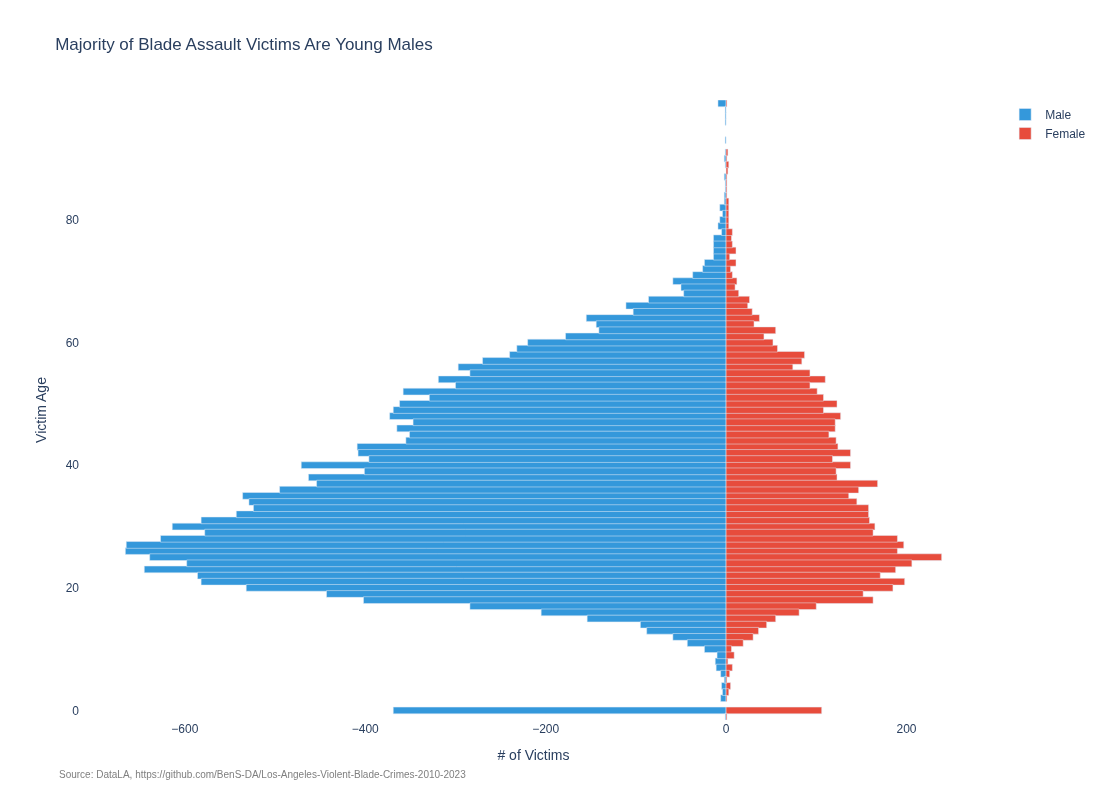

In [60]:
# Population pyramid chart - victim age vs. sex

# Assuming your data has columns: age_group, sex, victim_count
# Create separate data for males and females

male_data = blade_adw[blade_adw['Vict Sex'] == 'Male']
female_data = blade_adw[blade_adw['Vict Sex'] == 'Female']
Male=male_data['Vict Age'].value_counts()
Female=female_data['Vict Age'].value_counts()
pyramid = pd.concat([Male, Female], axis=1, keys=['Male', 'Female'])

pyr = go.Figure()

# Males on the left (negative values)
pyr.add_trace(go.Bar(
    y=pyramid.index,
    x=-pyramid['Male'],  # Negative for left side
    name='Male',
    orientation='h',
    marker=dict(color='#3498db')
))

# Females on the right
pyr.add_trace(go.Bar(
    y=pyramid.index,
    x=pyramid['Female'],
    name='Female',
    orientation='h',
    marker=dict(color='#e74c3c')
))

pyr.update_layout(
    title='Majority of Blade Assault Victims Are Young Males',
    barmode='overlay',
    bargap=0.1,
    xaxis=dict(title='# of Victims'),
    yaxis=dict(title='Victim Age'),
    height = 800,
    width=1100
)

pyr.update_traces(width=1.1)

pyr.update_layout(
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

pyr.add_annotation(
    text=f"Source: DataLA, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=-0.025,
    y=-0.1,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)

pyr.show()

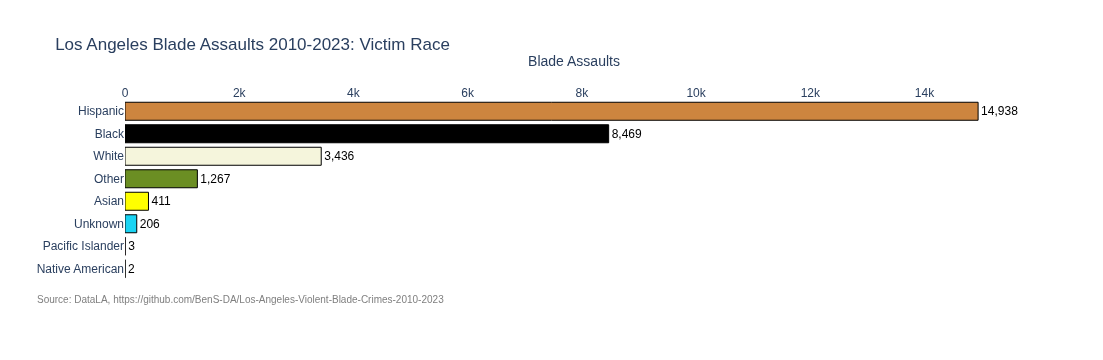

In [61]:
victim_race = blade_adw['Victim Ethnicity'].value_counts()

vr_graph =  px.bar(victim_race, 
                x=victim_race.values, 
                y=victim_race.index, 
                orientation='h',
                color = victim_race.index,
                title = "Los Angeles Blade Assaults 2010-2023: Victim Race", 
                text=victim_race.values,
                color_discrete_map = {
                'Hispanic': "Peru",
                'Black': "Black",
                'White': "Beige",
                'Other': "Olivedrab",
                'Asian': "Yellow"}
                    )
vr_graph.update_layout(xaxis_title = "Blade Assaults",yaxis_title="")
vr_graph.update_layout(showlegend=False) 
vr_graph.update_traces(textposition='outside')
vr_graph.update_traces(textfont_color='black')

vr_graph.update_layout(
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

vr_graph.update_layout(xaxis=dict(side='top'))
vr_graph.update_traces(textposition='outside', textfont=dict(color='black', size=12), marker_line_width=1,marker_line_color='black')
vr_graph.update_traces(texttemplate='%{text:,}')

vr_graph.add_annotation(
    text=f"Source: DataLA, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=-.1,
    y=-0.15,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)

vr_graph.show()

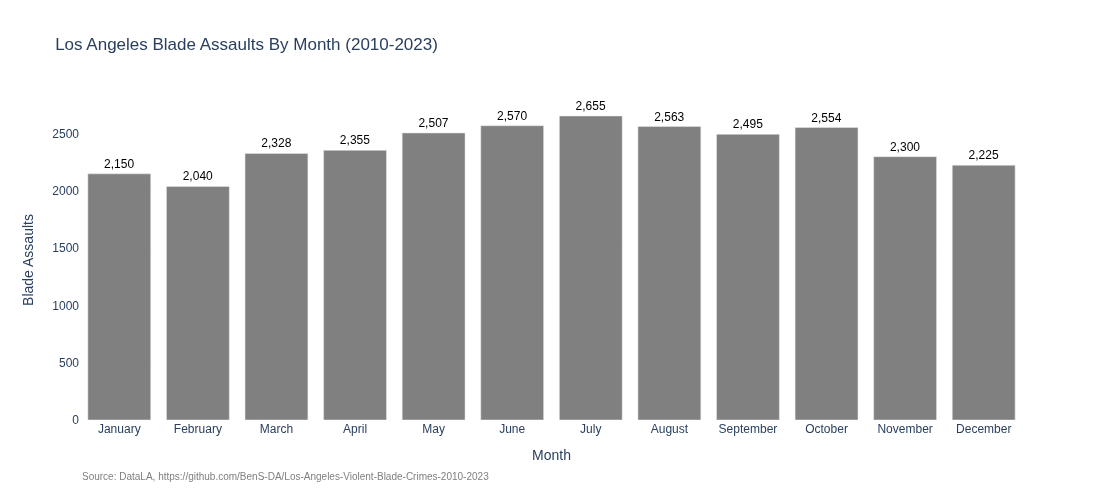

In [62]:
adw_month = blade_adw['Month'].value_counts()
fig_month = px.bar (adw_month,x=adw_month.index, y = adw_month.values, 
category_orders={'Month': ['January','February','March','April','May','June','July','August','September','October','November','December']},
title = 'Los Angeles Blade Assaults By Month (2010-2023)', text = adw_month.values, height = 500)
fig_month.update_layout(xaxis_title = "Month",yaxis_title="Blade Assaults")
fig_month.update_layout(
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)
fig_month.update_traces(textposition='outside')
fig_month.update_traces(textfont_color='black')
fig_month.update_traces(marker_color='grey')
fig_month.update_traces(texttemplate='%{text:,}')
fig_month.add_annotation(
    text=f"Source: DataLA, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=0,
    y=-0.2,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)

fig_month.show()

In [63]:
# Looking at the activity by month, this begs the question of whether there is any relationship between
# the temperature and frequency of events.

rounded_degree = blade_adw['Temp Hi F'].round()
temp = rounded_degree.value_counts().sort_index()
temp_bar = px.bar(temp,x=temp.index, y = temp.values, title = 'Is Warmer Weather Associated With More Blade Assaults?',
                   subtitle = "Los Angeles Blade Assaults 2010-2023: High Temperature On Day of Crime (°F)",
                  text = temp.values, height = 600, width= 1100)
temp_bar.update_layout(xaxis_title = "High Temperature For The Day (°F)",yaxis_title="Blade Assaults")
temp_bar.update_xaxes(type='category')

temp_bar.update_layout(
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

temp_bar.update_traces(marker_color='grey')
temp_bar.update_traces(textposition='none') 

temp_bar.add_annotation(
    text=f"Source: DataLA, Open-Meteo API, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=-0.0,
    y=-0.175,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)

temp_bar.show()

In [64]:
# How does it look by day of the week?

adw_dow = blade_adw['DoW'].value_counts()
fig_dow = px.bar (adw_dow,x=adw_dow.index, y = adw_dow.values, 
category_orders={'DoW': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']},
title = 'Weekends Are Rough',
        subtitle = "Los Angeles Blade Assaults By Day of Week (2010-2023)", text = adw_dow.values, height = 500)
fig_dow.update_layout(xaxis_title = "Day of Week",yaxis_title="Blade Assaults")
fig_dow.update_layout(
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)
fig_dow.update_traces(textposition='outside')
fig_dow.update_traces(textfont_color='black')
fig_dow.update_traces(marker_color='grey')
fig_dow.update_traces(texttemplate='%{text:,}')
fig_dow.add_annotation(
    text=f"Source: DataLA, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=0,
    y=-0.2,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)
fig_dow.show()

In [65]:
# How about time of day?

tod = blade_adw['HOUR'].value_counts().sort_index()
tod_bar = px.bar(tod,x=tod.index, y = tod.values, title = 'More Blade Assaults Occur In The Evening', 
    subtitle = "Los Angeles Blade Assaults By Hour of Day (2010-2023)", text = tod.values, height = 500)
tod_bar.update_layout(xaxis_title = "Hour of Day",yaxis_title="Blade Assaults")
tod_bar.update_xaxes(type='category')
tod_bar.update_layout(
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)
tod_bar.update_traces(textposition='outside')
tod_bar.update_traces(textfont_color='black')

tod_bar.update_traces(marker_color='grey')
tod_bar.update_traces(texttemplate='%{text:,}')

tod_bar.add_annotation(
    text=f"Source: DataLA, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=0,
    y=-0.2,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)

tod_bar.show()


In [66]:
# LAPD provides an AREA NAME (neighborhood) column where the crime happened.
# Compared to a list, this geospatial heat map might give you a better idea of where crimes occur.

h_plot = px.density_map(blade_adw, 
                           lat ="LAT", 
                           lon="LON", 
                           z="DR_NO", 
                           radius = 4,
                           zoom = 9.1, 
                           map_style='open-street-map',
                           height = 875,
                           title = "Los Angeles Blade Assaults 2010-2023")
h_plot.update_layout(coloraxis_showscale=False)

h_plot.add_annotation(
    text=f"Source: DataLA, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=0,
    y=-0.05,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)

h_plot.show()

In [67]:
# A generic description of the crime scene

crime_scene = blade_adw['Premis Desc'].value_counts().head(10)

cs_graph =  px.bar(crime_scene, 
                x=crime_scene.values, 
                y=crime_scene.index, 
                orientation='h',
                color = crime_scene.index,
                title = "Los Angeles Blade Assaults 2010-2023: Top 10 Crime Scenes",
                text=crime_scene.values, height = 500)
cs_graph.update_layout(xaxis_title = "Blade Assaults",yaxis_title="")
cs_graph.update_layout(showlegend=False) 
cs_graph.update_traces(textposition='outside')
cs_graph.update_layout(
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

cs_graph.update_layout(xaxis=dict(side='top'))
cs_graph.update_traces(textposition='outside', textfont=dict(color='black', size=12), marker_line_width=1,marker_line_color='black')
cs_graph.update_traces(texttemplate='%{text:,}')

cs_graph.add_annotation(
    text=f"Source: DataLA, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=-0.42,
    y=-0.1,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)

cs_graph.show()

In [68]:
# Mocodes, short for "modus operandi" are activities associated with the suspect in commission of the crime.
# These numerical codes are provided in a separate Adobe Acrobat file on the data provider's website.

bigmoco_dict = {
'100': 'Suspect Impersonate',
'101': 'Aid victim',
'102': 'Blind',
'103': 'Physically disabled',
'104': 'Customer',
'105': 'Delivery',
'106': 'Doctor',
'107': 'God',
'108': 'Infirm',
'109': 'Inspector',
'110': 'Involved in traffic/accident',
'112': 'Police',
'113': 'Renting',
'114': 'Repair Person',
'115': 'Returning stolen property',
'116': 'Satan',
'117': 'Salesman',
'118': 'Seeking someone',
'119': 'Sent by owner',
'120': 'Social Security/Medicare',
'121': 'DWP/Gas Company/Utility worker',
'122': 'Contractor',
'123': 'Gardener/Tree Trimmer',
'200': 'Suspect wore disguise',
'201': 'Bag',
'202': 'Cap/hat',
'203': 'Cloth (with eyeholes)',
'204': 'Clothes of opposite sex',
'205': 'Earring',
'206': 'Gloves',
'207': 'Handkerchief',
'208': 'Halloween mask',
'209': 'Mask',
'210': 'Make up (males only)',
'211': 'Shoes',
'212': 'Nude/partly nude',
'213': 'Ski mask',
'214': 'Stocking',
'215': 'Unusual clothes',
'216': 'Suspect wore hood/hoodie',
'217': 'Uniform',
'218': 'Wig',
'219': 'Mustache-Fake',
'220': 'Suspect wore motorcycle helmet',
'301': 'Escaped on (used) transit train',
'302': 'Aimed gun',
'303': 'Ambushed',
'304': 'Ate/drank on premises',
'305': 'Attacks from rear',
'306': 'Crime on upper floor',
'307': 'Defecated/urinated',
'308': 'Demands jewelry',
'309': 'Drive-by shooting',
'310': 'Got victim to withdraw savings',
'311': 'Graffiti',
'312': 'Gun in waistband',
'313': 'Hid in building',
'314': 'Hot Prowl',
'315': 'Jumped counter/goes behind counter',
'316': 'Makes victim give money',
'317': 'Pillowcase/suitcase',
'318': 'Prepared exit',
'319': 'Profanity Used',
'320': 'Quiet polite',
'321': 'Ransacked',
'322': 'Smashed display case',
'323': 'Smoked on premises',
'324': 'Takes money from register',
'325': 'Took merchandise',
'326': 'Used driver',
'327': 'Used lookout',
'328': 'Used toilet',
'329': 'Vandalized',
'330': 'Victims vehicle taken',
'331': 'Mailbox Bombing',
'332': 'Mailbox Vandalism',
'333': 'Used hand held radios',
'334': 'Brandishes weapon',
'335': 'Cases location',
'336': 'Chain snatch',
'337': 'Demands money',
'338': 'Disables Telephone',
'339': 'Disables video camera',
'340': 'Suspect follows victim/follows victim home',
'341': 'Makes vict lie down',
'342': 'Multi-susps overwhelm',
'343': 'Orders vict to rear room',
'344': 'Removes vict property',
'345': 'Riding bike',
'346': 'Snatch property and runs',
'347': 'Stalks vict',
'348': 'Takeover other',
'349': 'Takes mail',
'350': 'Concealed victim`s body',
'351': 'Disabled Security',
'352': 'Took Victim`s clothing or jewelry',
'353': 'Weapon Concealed',
'354': 'Suspect takes car keys',
'355': 'Demanded property other than money',
'356': 'Suspect spits on victim',
'357': 'Cuts or breaks purse strap',
'358': 'Forces Entry',
'359': 'Made unusual statement',
'360': 'Suspect is Other Family Member',
'361': 'Suspect is neighbor',
'362': 'Suspect attempts to carry victim away',
'363': 'Home invasion',
'364': 'Suspect is babysitter',
'365': 'Takeover robbery',
'366': 'Ordered vict to open safe',
'367': 'Was Transit Patrol',
'368': 'Suspect speaks foreign language',
'369': 'Suspect speaks spanish',
'370': 'Frisks victim/pats down victim/searches victim',
'371': 'Gang affiliation questions asked/made gang statement',
'372': 'Photographed victim/took pictures of victim',
'373': 'Physicall disabled/in wheelchair',
'374': 'Gang signs/threw gang signs using hands',
'375': 'Removes cash register',
'376': 'Makes victim kneel',
'377': 'Takes vict`s identification/driver license',
'378': 'Brings own bag',
'379': 'Turns off lights/electricity',
'380': 'Distracts Victim',
'381': 'Suspect apologizes',
'382': 'Removed money/property from safe',
'383': 'Suspect entered during open house/party/estate/yard sale',
'384': 'Suspect removed drugs from location',
'385': 'Suspect removed parts from vehicle',
'386': 'Suspect removed property from trunk of vehicle',
'387': 'Weapon (other than gun) in waistband',
'388': 'Suspect points laser at plane/helicopter',
'389': 'Knock-knock',
'390': 'Purse snatch',
'391': 'Used demand note',
'392': 'False Emergency Reporting',
'393': '911 Abuse',
'394': 'Susp takes UPS, Fedex, USPS packages',
'395': 'Murder/Suicide',
'396': 'Used paper plates to disguise license number',
'397': 'Cut lock (to bicycle, gate, etc.',
'398': 'Roof access (remove A/C, equip, etc.)',
'399': 'Vehicle to Vehicle shooting',
'400': 'Force used',
'401': 'Bit',
'402': 'Blindfolded',
'403': 'Bomb Threat, Bomb found',
'404': 'Bomb Threat, no bomb',
'405': 'Bound',
'406': 'Brutal Assault',
'407': 'Burned Victim',
'408': 'Choked/uses choke hold/Strangulation',
'409': 'Cover mouth w/hands',
'410': 'Covered victim`s face',
'411': 'Cut/stabbed',
'412': 'Disfigured',
'413': 'Drugged',
'414': 'Gagged',
'415': 'Handcuffed/Metal',
'416': 'Hit-Hit w/ weapon',
'417': 'Kicked',
'418': 'Kidnapped',
'419': 'Pulled victims hair',
'420': 'Searched',
'421': 'Threaten to kill',
'422': 'Threaten Victims family',
'423': 'Tied victim to object',
'424': 'Tore clothes off victim',
'425': 'Tortured',
'426': 'Twisted arm',
'427': 'Whipped',
'428': 'Dismembered',
'429': 'Vict knocked to ground',
'430': 'Vict shot',
'431': 'Sprayed with chemical',
'432': 'Intimidation',
'433': 'Makes victim kneel',
'434': 'Bed Sheets/Linens',
'435': 'Chain',
'436': 'Clothing',
'437': 'Flexcuffs/Plastic Tie',
'438': 'Rope/Cordage',
'439': 'Tape/Electrical etc...',
'440': 'Telephone/Electric Cord',
'441': 'Wire',
'442': 'Active Shooter',
'443': 'Threaten to harm victim (other than kill)',
'444': 'Pushed',
'445': 'Suspect swung weapon',
'446': 'Suspect swung fist',
'447': 'Suspect threw object at victim',
'448': 'Grabbed',
'449': 'Put a weapon to body',
'450': 'Suspect shot at victim (no hits)',
'451': 'Suffocation',
'500': 'Sex related acts',
'501': 'Susp ejaculated outside victim',
'502': 'Fecal Fetish',
'503': 'Fondle victim',
'504': 'Forced to disrobe',
'505': 'Forced to fondle suspect',
'506': 'Forced to masturbate suspect',
'507': 'Forced to orally copulate suspect',
'508': 'Hit victim prior, during, after act',
'509': 'Hugged',
'510': 'Kissed victims body/face',
'511': 'Masochism/bondage',
'512': 'Orally copulated victim',
'513': 'Photographed victim',
'514': 'Pornography',
'515': 'Put hand, finger or object into vagina',
'516': 'Reached climax/ejaculated',
'517': 'Sadism/Sexual gratification obtained by infliction of physical or mental pain on others',
'518': 'Simulated intercourse',
'519': 'Sodomy',
'520': 'Solicited/offered immoral act',
'521': 'Tongue or mouth to anus',
'522': 'Touched',
'523': 'Unable to get erection',
'524': 'Underwear Fetish',
'525': 'Urinated',
'526': 'Utilized Condom',
'527': 'Actual Intercourse',
'528': 'Masturbate',
'529': 'Indecent Exposure',
'530': 'Used lubricant',
'531': 'Suspect made sexually suggestive remarks',
'532': 'Suspect undressed victim',
'533': 'Consentual Sex',
'534': 'Suspect in vehicle nude/partially nude',
'535': 'Suspect asks minor`s name',
'536': 'Suspect removes own clothing',
'537': 'Suspect removes victim`s clothing',
'538': 'Suspect fondles self',
'539': 'Suspect puts hand in victim`s rectum',
'540': 'Suspect puts finger(s) in victim`s rectum',
'541': 'Suspect puts object(s) in victim`s rectum',
'542': 'Orders victim to undress',
'543': 'Orders victim to fondle suspect',
'544': 'Orders victim to fondle self',
'545': 'Male Victim of sexual assault',
'546': 'Susp instructs vict to make certain statements',
'547': 'Suspect force vict to bathe/clean/wipe',
'548': 'Suspect gives victim douche/enema',
'549': 'Suspect ejaculates in victims mouth',
'550': 'Suspect licks victim',
'551': 'Suspect touches victim genitalia/genitals over clothing',
'552': 'Suspect is Victim`s Father',
'553': 'Suspect is Victim`s Mother',
'554': 'Suspect is Victim`s Brother',
'555': 'Suspect is Victim`s Sister',
'556': 'Suspect is Victim`s Step-Father',
'557': 'Suspect is Victim`s Step-Mother',
'558': 'Suspect is Victim`s Uncle',
'559': 'Suspect is Victim`s Aunt',
'560': 'Suspect is Victim`s Guardian',
'561': 'Suspect is Victim`s Son',
'562': 'Suspect is Victim`s Daughter',
'563': 'Fetish, Other',
'601': 'Business',
'602': 'Family',
'603': 'Landlord/Tenant/Neighbor',
'604': 'Reproductive Health Services/Facilities',
'605': 'Traffic Accident/Traffic related incident',
'701': 'THEFT: Trick or Device',
'800': 'BUNCO',
'901': 'Organized Crime',
'902': 'Political Activity',
'903': 'Hatred/Prejudice',
'904': 'Strike/Labor Troubles',
'905': 'Terrorist Group',
'906': 'Gangs',
'907': 'Narcotics (Buy-Sell-Rip)',
'908': 'Prostitution',
'909': 'Ritual/Occult',
'910': 'Public Transit',
'911': 'Revenge',
'912': 'Insurance',
'913': 'Victim knew Suspect',
'914': 'Other Felony',
'915': 'Parolee',
'916': 'Forced theft of vehicle (Car-Jacking)',
'917': 'Victim`s Employment',
'918': 'Career Criminal',
'919': 'Road Rage',
'920': 'Homeland Security',
'921': 'Hate Incident',
'922': 'ATM Theft with PIN number',
'923': 'Stolen/Forged Checks (Personal Checks)',
'924': 'Stolen/Forged Checks (Business Checks)',
'925': 'Stolen/Forged Checks (Cashier`s Checks)',
'926': 'Forged or Telephonic Prescription',
'927': 'Fraudulent or forged school loan',
'928': 'Forged or Fraudulent credit applications',
'929': 'Unauthorized use of victim`s bank account information',
'930': 'Unauthorized use of victim`s credit/debit card or number',
'931': 'Counterfeit or forged real estate documents',
'932': 'Suspect uses victim`s identity in reporting a traffic collision',
'933': 'Suspect uses victim`s identity when arrested',
'934': 'Suspect uses victim`s identity when receiving a citation',
'935': 'Misc. Stolen/Forged documents',
'936': 'Dog Fighting',
'937': 'Cock Fighting',
'938': 'Animal Neglect',
'939': 'Animal Hoarding',
'940': 'Met online/Chat Room/on Party Line',
'941': 'Non-Revocable Parole (NRP)',
'942': 'Party/Flier party/Rave Party',
'943': 'Human Trafficking',
'944': 'Bait Operation',
'945': 'Estes Robbery',
'946': 'Gang Feud',
'947': 'Motorized Rental Scooter/Bike (Bird, Lime, etc).',
'1000': 'Suspects offers/solicits',
'1001': 'Aid for vehicle',
'1002': 'Amusement',
'1003': 'appraise',
'1004': 'Assistant',
'1005': 'Audition',
'1006': 'Bless',
'1007': 'Candy',
'1008': 'Cigarette',
'1009': 'Directions',
'1010': 'Drink (not liquor)',
'1011': 'Employment',
'1012': 'Find a job',
'1013': 'Food',
'1014': 'Game',
'1015': 'Gift',
'1016': 'Hold for safekeeping',
'1017': 'Information',
'1018': 'Liquor',
'1019': 'Money',
'1020': 'Narcotics',
'1021': 'Repair',
'1022': 'Ride',
'1023': 'Subscriptions',
'1024': 'Teach',
'1025': 'Train',
'1026': 'Use the phone or toilet',
'1027': 'Change',
'1028': 'Suspect solicits time of day',
'1100': 'Shots Fired',
'1101': 'Shots Fired (Animal) - Animal Services',
'1201': 'Absent-advertised in paper',
'1202': 'Victim was aged (60 & over) or blind/physically disabled/unable to care for self',
'1203': 'Victim of crime past 12 months',
'1204': 'Moving',
'1205': 'On Vacation/Tourist',
'1206': 'Under influence drugs/liquor',
'1207': 'Hitchhiker',
'1208': 'Victim was undocumented alien',
'1209': 'Salesman, Jewelry',
'1210': 'Professional (doctor, Lawyer, etc.)',
'1211': 'Public Official',
'1212': 'LA Police Officer',
'1213': 'LA Fireman',
'1214': 'Banking, ATM',
'1215': 'Prostitute',
'1216': 'Sales',
'1217': 'Teenager(Use if victim`s age is unknown)',
'1218': 'Victim was Homeless/Transient',
'1219': 'Nude',
'1220': 'Partially Nude',
'1221': 'Missing Clothing/Jewelry',
'1222': 'Victim was gay',
'1223': 'Riding bike',
'1224': 'Drive-through (not merchant)',
'1225': 'Stop sign/light',
'1226': 'Catering Truck Operator',
'1227': 'Delivery person',
'1228': 'Leaving Business Area',
'1229': 'Making bank drop',
'1230': 'Postal employee',
'1231': 'Taxi Driver',
'1232': 'Bank, Arriving at',
'1233': 'Bank, Leaving',
'1234': 'Bar Customer',
'1235': 'Bisexual/sexually oriented towards both sexes',
'1236': 'Clerk/Employer/Owner',
'1237': 'Victim was customer',
'1238': 'Victim was physically disabled',
'1239': 'Transgender',
'1240': 'Vehicle occupant/Passenger',
'1241': 'Spouse',
'1242': 'Parent',
'1243': 'Co-habitants',
'1244': 'Victim was forced into business',
'1245': 'Victim was forced into residence',
'1247': 'Opening business',
'1248': 'Closing business',
'1251': 'Victim was a student',
'1252': 'Victim was a street vendor',
'1253': 'Bus Driver',
'1254': 'Train Operator',
'1255': 'Followed Transit System',
'1256': 'Patron',
'1257': 'Victim is Newborn-5 years old',
'1258': 'Victim is 6 years old thru 13 years old',
'1259': 'Victim is 14 years old thru 17 years old',
'1260': 'Deaf/Hearing Impaired',
'1261': 'Victim was mentally challenged/mentally disabled',
'1262': 'Raped while unconscious',
'1263': 'Agricultural Target',
'1264': 'Pipeline',
'1265': 'Mailbox',
'1266': 'Victim was security guard',
'1267': 'Home under construction',
'1268': 'Victim was 5150/Mental Illness',
'1269': 'Victim was armored car driver',
'1270': 'Victim was gang member',
'1271': 'Victim was Law Enforcement (not LAPD)',
'1272': 'Victim was at/leaving medical/retail/non-retail cannabis location',
'1273': 'Home was being fumigated',
'1274': 'Victim was Inmate/Incarcerated',
'1275': 'Vacant Residence/Building',
'1276': 'Pregnant',
'1277': 'Gardner',
'1278': 'Victim was Uber/Lyft driver',
'1279': 'Victim was Foster child',
'1280': 'Victim was Foster parent',
'1281': 'Victim was Pistol-whipped',
'1300': 'Vehicle involved',
'1301': 'Forced victim vehicle to curb',
'1302': 'Suspect forced way into victim`s vehicle',
'1303': 'Hid in rear seat',
'1304': 'Stopped victim vehicle by flagging down, forcing T/A, etc.',
'1305': 'Victim forced into vehicle',
'1306': 'Victim parking, garaging vehicle',
'1307': 'Breaks window',
'1308': 'Drives by and snatches property',
'1309': 'Susp uses vehicle',
'1310': 'Victim in vehicle',
'1311': 'Victim removed from vehicle',
'1312': 'Suspect follows victim in vehicle',
'1313': 'Suspect exits vehicle and attacks pedestrian',
'1314': 'Victim loading vehicle',
'1315': 'Victim unloading vehicle',
'1316': 'Victim entering their vehicle',
'1317': 'Victim exiting their vehicle',
'1318': 'Suspect follows victim home',
'1401': 'Blood Stains',
'1402': 'Evidence Booked (any crime)',
'1403': 'Fingerprints',
'1404': 'Footprints',
'1405': 'Left Note',
'1406': 'Tool Marks',
'1407': 'Bullets/Casings',
'1408': 'Bite Marks',
'1409': 'Clothes',
'1410': 'Gun Shot Residue',
'1411': 'Hair',
'1412': 'Jewelry',
'1413': 'Paint',
'1414': 'Photographs',
'1415': 'Rape Kit',
'1416': 'Saliva',
'1417': 'Semen',
'1418': 'Skeleton/Bones',
'1419': 'Firearm booked as evidence',
'1420': 'Video surveillance booked/available',
'1501': 'Other MO (see rpt)',
'1505': 'Anti-mental disability',
'1506': 'Anti-physical disability',
'1507': 'Anti-female',
'1508': 'Anti-male',
'1509': 'Anti-Gender non-conforming',
'1510': 'Anti-Transgender',
'1511': 'Anti-American/Alaskan Native',
'1512': 'Anti-Arab',
'1513': 'Anti-Asian',
'1514': 'AntI-Black or African American',
'1515': 'Anti-Citizenship Status',
'1516': 'Anti-Hispanic or Latino',
'1517': 'Anti-Multiple Races (Group)',
'1518': 'Anti-Native Hawaiian or Other Pacific Islander',
'1519': 'Anti-Other Race/Ethnicity/Ancestry',
'1520': 'Anti-White',
'1521': 'Anti-Atheism/Agnosticism',
'1522': 'Anti-Buddhist',
'1523': 'Anti-Catholic',
'1524': 'Anti-Eastern Orthodox (Russian/Greek/Other)',
'1525': 'Anti-Hindu',
'1526': 'Anti-Islamic (Muslim)',
'1527': 'Anti-Jehovah`s Witness',
'1528': 'Anti-Jewish',
'1529': 'Anti-Mormon',
'1530': 'Anti-Multiple Religions Group',
'1531': 'Anti-Other Christian',
'1532': 'Anti-Other Religion',
'1533': 'Anti-Protestant',
'1534': 'Anti-Sikh',
'1535': 'Anti-Bisexual',
'1536': 'Anti-Gay (Male)',
'1537': 'Anti-Heterosexual',
'1538': 'Anti-Lesbian',
'1539': 'Anti-Lesbian/Gay/Bisexual or Transgender (Mixed Group)',
'1601': 'Bodily Force',
'1602': 'Cutting Tool',
'1603': 'Knob Twist',
'1604': 'Lock Box',
'1605': 'Lock slip/key/pick',
'1606': 'Open/unlocked',
'1607': 'Pried',
'1608': 'Removed',
'1609': 'Smashed',
'1610': 'Tunneled',
'1611': 'Shaved Key',
'1612': 'Punched/Pulled Door Lock',
'1701': 'Elder Abuse/Physical',
'1702': 'Elder Abuse/Financial',
'1801': 'Susp is/was mother`s boyfriend',
'1802': 'Susp is/was victim`s co-worker',
'1803': 'Susp is/was victim`s employee',
'1804': 'Susp is/was victim`s employer',
'1805': 'Susp is/was fellow gang member',
'1806': 'Susp is/was father`s girlfriend',
'1807': 'Susp is/was priest/pastor',
'1808': 'Susp is/was other religious confidant',
'1809': 'Susp is/was rival gang member',
'1810': 'Susp is/was roommate',
'1811': 'Susp is/was victim`s teacher/coach',
'1812': 'Susp is/was foster parent/sibling',
'1813': 'Susp is/was current/former spouse/co-habitant',
'1814': 'Susp is/was current/former boyfriend/girlfriend',
'1815': 'Susp was student',
'1816': 'Suspect is/was known gang member',
'1817': 'Acquaintance',
'1818': 'Caretaker/care-giver/nanny',
'1819': 'Common-law Spouse',
'1820': 'Friend',
'1821': 'Spouse',
'1822': 'Stranger',
'1823': 'Brief encounter/Date',
'1824': 'Classmate',
'1900': 'Auction Fraud/eBay/cragslist,etc. (Internet based theft)',
'1901': 'Child Pornography/In possession of/Via computer',
'1902': 'Credit Card Fraud/Theft of services via internet',
'1903': 'Cyberstalking (Stalking using internet to commit the crime)',
'1904': 'Denial of computer services',
'1905': 'Destruction of computer data',
'1906': 'Harrassing E-Mail/Text Message/Other Electronic Communications',
'1907': 'Hate Crime materials/printouts/e-mails',
'1908': 'Identity Theft via computer',
'1909': 'Introduction of virus or contaminants into computer system/program',
'1910': 'Minor solicited for sex via internet/Known minor',
'1911': 'Theft of computer data',
'1912': 'Threatening E-mail/Text Messages',
'1913': 'Suspect meets victim on internet/chatroom',
'1914': 'Unauthorized access to computer system',
'1915': 'Internet Extortion',
'1916': 'Victim paid by wire transfer',
'2000': 'Domestic violence',
'2001': 'Suspect on drugs',
'2002': 'Suspect intoxicated/drunk',
'2003': 'Suspect was 5150/mentally disabled',
'2004': 'Suspect is homeless/transient',
'2005': 'Suspect uses wheelchair',
'2006': 'Suspect was transgender',
'2007': 'Suspect was gay',
'2008': 'In possession of a Ballistic vest',
'2009': 'Suspect was Inmate/Incarcerated',
'2010': 'Suspect was Jailer/Police Officer',
'2011': 'Vendor (street or sidewalk)',
'2012': 'Suspect was costumed character (e.g., Barney, Darth Vader, Spiderman, etc.)',
'2013': 'Tour Bus/Van Operator',
'2014': 'Suspect was Uber/Lyft driver',
'2015': 'Suspect was Foster child',
'2016': 'Suspect was Train Operator',
'2017': 'Suspect was MTA Bus Driver',
'2018': 'Cannabis related',
'2019': 'Theft of animal (non-livestock)',
'2020': 'Mistreatment of animal',
'2021': 'Suspect was Aged (60+over)',
'2022': 'Suspect was Hitchhiker',
'2023': 'Suspect was Prostitute',
'2024': 'Suspect was Juvenile',
'2025': 'Suspect was Bisexual',
'2026': 'Suspect was Deaf/hearing impaired',
'2027': 'Suspect was Pregnant',
'2028': 'Suspect was Repeat/known shoplifter',
'2029': 'Victim used profanity',
'2030': 'Victim used racial slurs',
'2031': 'Victim used hate-related language',
'2032': 'Victim left property unattended',
'2033': 'Victim refused to cooperate w/investigation',
'2034': 'Victim was asleep/unconscious',
'2035': 'Racial slurs',
'2036': 'Hate-related language',
'2037': 'Temporary/Vacation rental (AirBnB, etc)',
'2038': 'Restraining order in place between suspect and victim',
'2039': 'Victim was costumed character (e.g., Barney, Darth Vader, Spiderman, etc.)',
'2040': 'Threats via Social Media',
'2041': 'Harassment via Social Media',
'2042': 'Victim staying at short-term vacation rental',
'2043': 'Victim is owner of short-term vacation rental',
'2044': 'Suspect staying at short-term vacation rental',
'2045': 'Suspect is owner of short-term vacation rental',
'2046': 'Suspect damaged property equal to or exceeding $25,000',
'2047': 'Victim was injured requiring transportation away from scene for medical reasons',
'2048': 'Victim was on transit platform',
'2049': 'Victim was passenger on bus',
'2050': 'Victim was passenger on train',
'2051': 'Suspect was passenger on bus',
'2052': 'Suspect was passenger on train',
'2053': 'Victim targeted based on religion',
'2054': 'Victim targeted based on sexual orientation',
'2055': 'Victim targeted based on Race/Ethnicity/Ancestry',
'2056': 'Victim targeted based on gender',
'2057': 'Victim targeted based on disability',
'2058': 'Victim targeted based on Gender Non-conforming',
'2059': 'Vict rptd sexual assault at time of arst for unrelated incident',
'2060': 'Victim inside tent',
'9999': 'Indistinctive MO',
'2100': 'Observation/Surveillance',
'2101': 'Counter Surveillance efforts',
'2102': 'Questions about-security procedures',
'2103': 'Appears to take measurements',
'2104': 'Photography (pics or video footage)',
'2105': 'Draws diagrams or takes notes',
'2106': 'Abandons suspicious package/item',
'2107': 'Abandons vehicle restricted area',
'2108': 'Enters restricted area w/o authorization',
'2109': 'Testing or Probing of Security',
'2110': 'Contraband at security check point',
'2111': 'Susp purchase of legal materials',
'2112': 'Acquires restricted items/information',
'2113': 'Acquires illegal explosive/precur agents',
'2114': 'Acquires illegal chemical agent',
'2115': 'Acquires illegal biological agents',
'2116': 'Acquires illegal rediological material',
'2117': 'Uses explosives for illegal purposes',
'2118': 'Uses chemical agent illegally',
'2119': 'Uses biological agent illegally',
'2120': 'Uses radiological material illegally',
'2121': 'Acquires uniforms without legit reason',
'2122': 'Acquires official vehicle without legit reason',
'2123': 'Pursues training/education with suspect motives',
'2124': 'Large unexplained sum of currency',
'2125': 'Multiple passports/ID`s/travel documents',
'2126': 'Expressed or Implied threats',
'2127': 'Brags about affiliation with extremist organization',
'2128': 'Coded conversation or transmission',
'2129': 'Overt support of terrorist network',
'2130': 'Uses Facsimile/Hoax explosive device (susp offer/solicts)',
'2131': 'Uses Facsimile/Hoax dispersal device (susp offer/solicts)',
'2135': 'Sensitive event schedules(susp offer/solicts)',
'2136': 'VIP appearance or travel schedules (susp offer/solicts)',
'2137': 'Security schedules (susp offer/solicts)',
'2138': 'Blueprints/building plans (susp offer/solicts)',
'2139': 'Evacuation or emergency plans (susp offer/solicts)',
'2140': 'Security plans (susp offer/solicts)',
'2141': 'Weapons or ammunition (susp offer/solicts)',
'2142': 'Explosive materials(susp offer/solicts)',
'2143': 'Illicit chemical agents (susp offer/solicts)',
'2144': 'Illicit biological agents (susp offer/solicts)',
'2145': 'Illicit radiological material (susp offer/solicts)',
'2146': 'Other sensitive materials (susp offer/solicts)',
'2150': 'Coded/ciphered literature/correspondence',
'2151': 'Sensitive event schedules (susp in possession)',
'2152': 'VIP appearance or travel schedules (susp in possession)',
'2153': 'Security schedules (susp in possession)',
'2154': 'Blueprints/building plans (susp in possession)',
'2155': 'Evacuation or emergency plans (susp in possession)',
'2156': 'Security plans (susp in possession)',
'2157': 'Weapons or ammunition (susp in possession)',
'2158': 'Explosive materials (susp in possession)',
'2159': 'Illicit chemical agents (susp in possession)',
'2160': 'Illicit biological agents (susp in possession)',
'2161': 'Illicit radiological material (susp in possession)',
'2162': 'Other sensitive materials (susp in possession)',
'2163': 'Facsimile/Hoax explosive device (susp in possession)',
'2164': 'Facsimile/Hoax dispersal device (susp in possession)',
'2170': 'Associates with known/susp terrorist',
'2171': 'Corresponds w/suspected terrorist',
'2172': 'In photos w/suspected terrorists',
'2173': 'Organization supports overthrow/violent acts',
'2180': 'Bomb/explosive device',
'2181': 'Biological agent',
'2182': 'Chemical agent',
'2183': 'Radiological matter',
'2184': 'Military ordinance',
'2185': 'Incendiary device',
'2186': 'Pyrotechnics',
'2187': 'Facsimile/Hoax device',
'2190': 'Financing terrorism',
'2191': 'Victim`s religion',
'2192': 'Victim`s national origin',
'2193': 'Influencing societal action',
'2194': 'Furthering objectives by force',
'2197': 'SSI - Food/Agriculture',
'2198': 'Pipeline',
'2199': 'SSI - Postal/Shipping/Mailbox',
'2200': 'SSI - Government Facilities/Bldg.',
'2201': 'Church',
'2202': 'Synagogue',
'2203': 'University',
'2204': 'School',
'2205': 'Sports Venue',
'2206': 'Theater',
'2207': 'Amusement Park',
'2208': 'Shopping Mall',
'2209': 'Convention Center',
'2210': 'Mass Gathering Location',
'2211': 'Bridge',
'2212': 'High-Rise Building',
'2213': 'Airport',
'2214': 'Freight Train',
'2215': 'Train Tracks',
'2216': 'SSI - Chemical storage/Manufacturing plant',
'2217': 'SSI - Telecommunication Facility/Location',
'2218': 'SSI - Energy Plant/Facility',
'2219': 'SSI - Water Facility',
'2220': 'Sewage Facility/Pipe',
'2221': 'SSI - Nuclear Facility, Reactors, Materials & Waste',
'2222': 'SSI - Dam/Reservoir',
'2223': 'SSI - National Monuments/Icon/Cultural significance',
'2224': 'Tactical significance',
'2225': 'SSI - Healthcare & Public Health/Hospital/Medical Clinic',
'2226': 'Abortion clinic',
'2227': 'SSI - Defense Industrial Base/Facility',
'2228': 'SSI - Transportation System',
'2229': 'SSI - Commercial Facilities',
'2230': 'SSI - Information Technology',
'2231': 'SSI - Banking and Finance',
'2232': 'SSI - Critical Manufacturing',
'2233': 'SSI - Emergency Services',
'2234': 'SSI - Waste',
'2301': 'Breach/Attempted Intrusion',
'2302': 'Misrepresentation',
'2303': 'Theft/Loss/Diversion',
'2304': 'Sabotage/Tampering/Vandalism',
'2305': 'Cyber Attack',
'2306': 'Espouses violent extremist views',
'2307': 'Aviation activity',
'2308': 'Eliciting information',
'2309': 'Recruiting',
'2310': 'Materials',
'2311': 'Acquisition of expertise',
'2312': 'Weapons discovery',
'2313': 'Finance',
'2314': 'TSC hit',
'2315': 'Sector-Specific Incident (SSI)',
'3001': 'T/C - Veh vs Non-collision',
'3002': 'T/C - Officer Involved T/C',
'3003': 'T/C - Veh vs Ped',
'3004': 'T/C - Veh vs Veh',
'3005': 'T/C - Veh vs Veh on other roadway',
'3006': 'T/C - Veh vs Parked Veh',
'3007': 'T/C - Veh vs Train',
'3008': 'T/C - Veh vs Bike',
'3009': 'T/C - Veh vs M/C',
'3010': 'T/C - Veh vs Animal',
'3011': 'T/C - Veh vs Fixed Object',
'3012': 'T/C - Veh vs Other Object',
'3013': 'T/C - M/C vs Veh',
'3014': 'T/C - M/C vs Fixed Object',
'3015': 'T/C - M/C vs Other',
'3016': 'T/C - Bike vs Veh',
'3017': 'T/C - Bike vs Train',
'3018': 'T/C - Bike vs Other',
'3019': 'T/C - Train vs Veh',
'3020': 'T/C - Train vs Train',
'3021': 'T/C - Train vs Bike',
'3022': 'T/C - Train vs Ped',
'3023': 'T/C - Train vs Fixed Object',
'3024': 'T/C - (A) Severe Injury',
'3025': 'T/C - (B) Visible Injury',
'3026': 'T/C - (C) Complaint of Injury',
'3027': 'T/C - (K) Fatal Injury',
'3028': 'T/C - (N) Non Injury',
'3029': 'T/C - Hit and Run Fel',
'3030': 'T/C - Hit and Run Misd',
'3032': 'T/C - Private Property - Yes',
'3033': 'T/C - Private Property - No',
'3034': 'T/C - City Property Involved - Yes',
'3035': 'T/C - City Property Involved - No',
'3036': 'T/C - At Intersection - Yes',
'3037': 'T/C - At Intersection - No',
'3038': 'T/C - DUI Felony',
'3039': 'T/C - DUI Misdemeanor',
'3040': 'T/C - Resulting from Street Racing/Speed Exhibition',
'3062': 'T/C - Bicyclist in Bicycle Lane',
'3063': 'T/C - E-Bike',
'3064': 'T/C - Motorized Scooter',
'3101': 'T/C - PCF (A) In the Narrative',
'3102': 'T/C - PCF (B) Other Improper Driving',
'3103': 'T/C - PCF (C) Other Than Driver',
'3104': 'T/C - PCF (D) Unk',
'3201': 'T/C - Weather/Lighting/Roadway',
'3301': 'T/C - Traffic Control Devices',
'3401': 'T/C - Type of Collision',
'3501': 'T/C - Ped Actions',
'3601': 'T/C - Special Information and Other',
'3602': 'T/C - Unlicensed motorist',
'3603': 'T/C - Bicyclists colliding into opened vehicle door',
'3701': 'T/C - Movement Preceding Collision',
'3801': 'T/C - Sobriety',
'3901': 'T/C - Safety Equipment',
'4001': 'T/C - Central',
'4002': 'T/C - Rampart',
'4003': 'T/C - Southwest',
'4004': 'T/C - Hollenbeck',
'4005': 'T/C - Harbor',
'4006': 'T/C- Hollywood',
'4007': 'T/C - Wilshire',
'4008': 'T/C - West Los Angeles',
'4009': 'T/C - Van Nuys',
'4010': 'T/C - West Valley',
'4011': 'T/C - Northeast',
'4012': 'T/C - 77th',
'4013': 'T/C - Newton',
'4014': 'T/C - Pacific',
'4015': 'T/C - North Hollywood',
'4016': 'T/C - Foothill',
'4017': 'T/C - Devonshire',
'4018': 'T/C - Southeast',
'4019': 'T/C - Mission',
'4020': 'T/C - Olympic',
'4021': 'T/C - Topanga',
'4024': 'T/C - Central Traffic (CTD)',
'4025': 'T/C - South Traffic (STD)',
'4026': 'T/C - Valley Traffic (VTD)',
'4027': 'T/C - West Traffic (WTD)'
}

In [69]:
# Explode the Mocodes list column into a data frame
kablooey = blade_adw['MOCO Splits'].explode()
standalone_column = pd.DataFrame(kablooey)
standalone_column['MOCO Splits'] = standalone_column['MOCO Splits'].str.lstrip('0')
standalone_column['Long Form MOCO'] = standalone_column['MOCO Splits'].map(bigmoco_dict)

In [70]:
print("Top 25 MOCO Codes - Los Angeles Blade Assaults 2010-2023")
standalone_column['Long Form MOCO'].value_counts().head(25)

Top 25 MOCO Codes - Los Angeles Blade Assaults 2010-2023


Long Form MOCO
Cut/stabbed                                  13731
Brandishes weapon                            12690
Evidence Booked (any crime)                   9777
Victim knew Suspect                           7829
Stranger                                      7368
Suspect swung weapon                          6502
Hit-Hit w/ weapon                             6418
Force used                                    4954
Suspect is homeless/transient                 4393
Intimidation                                  3358
Threaten to kill                              3286
Victim was Homeless/Transient                 3052
Gangs                                         2935
Threaten to harm victim (other than kill)     2142
Profanity Used                                1812
Photographs                                   1671
Multi-susps overwhelm                         1610
Susp uses vehicle                             1528
Domestic violence                             1524
Suspect intoxica

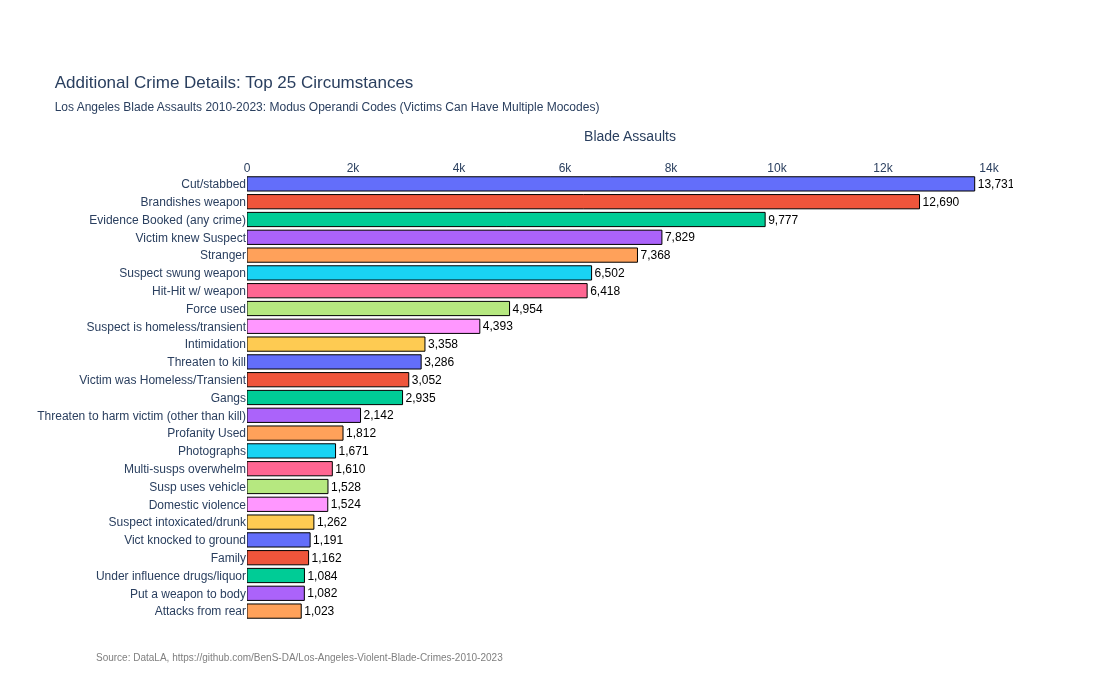

In [71]:
mocodf = standalone_column['Long Form MOCO'].value_counts().head(25)

moco_graph =  px.bar(mocodf, 
                x=mocodf.values, 
                y=mocodf.index, 
                orientation='h',
                color = mocodf.index,
                title = "Additional Crime Details: Top 25 Circumstances",
                subtitle = "Los Angeles Blade Assaults 2010-2023: Modus Operandi Codes (Victims Can Have Multiple Mocodes)",
                text=mocodf.values,
                height = 700)
moco_graph.update_layout(xaxis_title = "Blade Assaults",yaxis_title="")
moco_graph.update_layout(showlegend=False)
moco_graph.update_traces(textposition='inside')
moco_graph.update_traces(textfont_color='black')
moco_graph.update_layout(xaxis=dict(side='top'))

moco_graph.update_traces(textposition='outside', textfont=dict(color='black', size=12), marker_line_width=1,marker_line_color='black')
moco_graph.update_layout(
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

moco_graph.update_layout(margin=dict(t=175)) 

moco_graph.update_traces(texttemplate='%{text:,}')

moco_graph.add_annotation(
    text=f"Source: DataLA, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=-0.2,
    y=-0.1,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)

moco_graph.show()

In [72]:
blade_adw['Status Desc'].value_counts()

Status Desc
Invest Cont     13058
Adult Arrest     9223
Adult Other      5872
Juv Arrest        528
Juv Other          60
UNK                 1
Name: count, dtype: int64